# Movies Rating Analysis
## Tori Cox

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics

In [2]:
ratings = pd.read_table("data/ml-100k/u.data", names=["userid","itemid","rating","timestamp"])

In [3]:
items = pd.read_table("data/ml-100k/u.item", sep="|", names=["itemid","movie","releasedate","videoreleasedate","IMDbURL","unknown","action","adventure","animation","childrens","comedy","crime","documentary","drama","fantasy","filmnoir","horror","musical","mystery","romance","scifi","thriller","war","western"], encoding="ISO-8859-1")

 ## Movies with Median Rating of 5 

To report the title of every movie in this data set with a median rating of 5, I used a pivot table to find each movie's mendian rating: 

In [4]:
medianRatings = ratings.pivot_table(index='itemid', values = 'rating', aggfunc='median')

In [5]:
medianRatings = medianRatings.reset_index()

In [6]:
merged = pd.merge(medianRatings, items, on = 'itemid')

In [7]:
median5 = merged[merged['rating'] == 5.0]

In [8]:
median5['movie']

11                             Usual Suspects, The (1995)
49                                       Star Wars (1977)
63                       Shawshank Redemption, The (1994)
113     Wallace & Gromit: The Best of Aardman Animatio...
118                Maya Lin: A Strong Clear Vision (1994)
126                                 Godfather, The (1972)
133                                   Citizen Kane (1941)
168                            Wrong Trousers, The (1993)
250                                Shall We Dance? (1996)
312                                        Titanic (1997)
317                               Schindler's List (1993)
319     Paradise Lost: The Child Murders at Robin Hood...
407                                 Close Shave, A (1995)
482                                     Casablanca (1942)
602                                    Rear Window (1954)
813                         Great Day in Harlem, A (1994)
1121                       They Made Me a Criminal (1939)
1174          

## Which genre of movie is most appreciated?

My strategy for this problem was to create the pivot table with the aveage rating for each movie, merge it with the items table to add the names of the movies, and then I used for loops to calculate the mean, std, and var for each genre and create a list for each value.  Then I created a dictionary of the four lists (genre, rating, std, and var) and used pandas to convert that dictionary into a dataframe.

In [9]:
avgRatings = ratings.pivot_table(index='itemid', values = 'rating')

In [10]:
merged2 = pd.merge(avgRatings, items, on = 'itemid')

In [11]:
genres = ["action","adventure","animation","childrens","comedy","crime","documentary","drama","fantasy","filmnoir","horror","musical","mystery","romance","scifi","thriller","war","western"]

In [12]:
genreRatings = []
for genre in genres:
    avgRating = merged2[merged2[genre] == 1]['rating'].mean()
    genreRatings.append(avgRating)

In [13]:
StdList = []
for genre in genres:
    genreStd = merged2[merged2[genre] == 1]['rating'].std()
    StdList.append(genreStd)

In [14]:
VarList = []
for genre in genres:
    genreVar = merged2[merged2[genre] == 1]['rating'].var()
    VarList.append(genreVar)

In [15]:
genresDict = {"Genre":genres, "Avg Rating":genreRatings, "Std":StdList, "Var":VarList}

In [16]:
genresRatings = pd.DataFrame(genresDict, columns=['Genre','Avg Rating','Std','Var'])

In [17]:
genresRatings

,Genre,Avg Rating,Std,Var
0,action,2.966332,0.707861,0.501068
1,adventure,3.143967,0.623983,0.389355
2,animation,3.298813,0.645251,0.416348
3,childrens,2.916885,0.624512,0.390015
4,comedy,3.000565,0.719212,0.517266
5,crime,3.211015,0.700488,0.490683
6,documentary,3.229273,0.990266,0.980627
7,drama,3.187353,0.790183,0.624390
8,fantasy,2.849830,0.816855,0.667253
9,filmnoir,3.548351,0.832246,0.692633


### Which genre is the most loved? (i.e. has the highest average)

Film Noir is the most loved genre with the highest average rating value of 3.548351

In [18]:
genresRatings.sort_values('Avg Rating', ascending = False).head(1)

,Genre,Avg Rating,Std,Var
9,filmnoir,3.548351,0.832246,0.692633


### Which genre is the most consistent? (i.e. has the lowest standard deviation)

Musicals is the most consistent genre with the lowest standard deviation of 0.520265

In [19]:
genresRatings.sort_values('Std').head(1)

,Genre,Avg Rating,Std,Var
11,musical,3.376423,0.520265,0.270676


### Bar chart of the average rating for each genre along with a whisker on each bar for the variance.

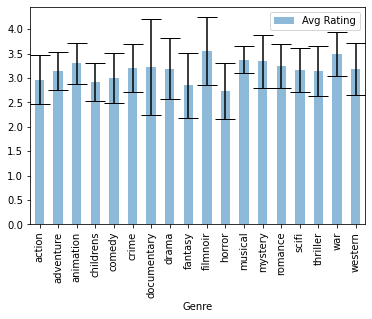

In [20]:
ax = genresRatings.plot.bar(x='Genre', y='Avg Rating', yerr= 'Var', align='center', alpha=0.5, ecolor='black', capsize=10)

## Do customers tend to evaluate older movies with a higher rating than newer movies?

#### First I sliced the strings in the release date column and converted them to floats:

In [21]:
items['year'] = items['releasedate'].str[-4:]

In [22]:
items['year'] = items['year'].astype(float)

#### Then I removed the movie that had an unknown release date:

In [23]:
items = items[-items['year'].isna()]

#### Then I create a pivot table to calcuate the average rating for each movie and reset the index

In [24]:
avgRatings = ratings.pivot_table(index='itemid', values = 'rating')

In [25]:
avgRatings = avgRatings.reset_index()

####  I had to merge the two dataframes because they were different lengths because of the movie I removed, and then I used the two columns from the merged dataframe to create a new dataframe with just the year and the average rating:

In [26]:
merged3 = pd.merge(avgRatings, items, on = 'itemid')

In [27]:
yearRating = merged3[['year','rating']]

####  Then I used the linear regression functions from your examples to run the linear regression  and plot it with the data but after using stats to determine $R^2$ I realized this was probably not necessary.  But it worked so I left it in.

In [28]:
def sum_of_squares(avals, bvals):
        assert len(avals) == len(bvals)
        amean = sum(avals) / len(avals)
        bmean = sum(bvals) / len(bvals)
        total = 0
        for i in range(len(avals)):
            total += (avals[i]-amean) * (bvals[i] - bmean)
        return total

In [29]:
def find_slope(xvals, yvals):
    return sum_of_squares(xvals, yvals) / sum_of_squares(xvals, xvals)

In [30]:
def find_intercept(xvals, yvals):
    slope = find_slope(xvals, yvals)
    ymean = sum(yvals) / len(yvals)
    xmean = sum(xvals) / len(xvals)
    return ymean - slope * xmean

In [31]:
def linear_regression(xvals, yvals):
    slope = find_slope(xvals, yvals)
    intercept = find_intercept(xvals, yvals)
    return [slope, intercept]

In [32]:
slopeIntercept = linear_regression(yearRating['year'], yearRating['rating'])

In [33]:
slope = slopeIntercept[0]

In [34]:
intercept = slopeIntercept[1]

### Plot of the year (y-axis) v.s. the average rating (x-axis) and the regression line.

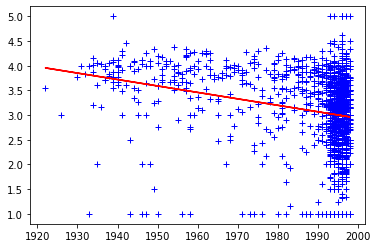

In [35]:
plt.plot(yearRating['year'], yearRating['rating'], 'b+', yearRating['year'], yearRating['year'] * slope + intercept, 'r-')

####  I used this code to find r and then squared it.

In [36]:
slope, intercept, r, p, se = stats.linregress(yearRating['year'], yearRating['rating'])

In [37]:
r*r

0.05650353407304701

### Conclusion

####  Based on the graph and an $R^2$ value of 0.0565, I conclude that there is no relationship between the year a movie was released and the rating it received in this data set.  The $R^2$ is close to zero and the graph does not display a strong correlation between years and ratings.